Problem definition


Le lien Kaggle du dataset :

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

Loan Prediction Problem Dataset

In [1]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import pickle

In [2]:
# Lire la base de données
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
pd.set_option('display.max_rows', df.shape[0] + 1)
# df

In [4]:
pd.set_option('display.max_rows', 10)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
# Voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
Length: 13, dtype: int64

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

print('les variables catégoriques sont:', var_cat)
print('les variables numériques sont:', var_num)

les variables catégoriques sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
# Renseigner les valeurs manquantes
cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
  if c == object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
    
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [13]:
# Pour les variables catégoriques on va remplaczr les valeurs manquantes par les valeurs qui se repetent le plus
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

np.False_

In [14]:
# Pour les variables numériques on va remplacer les valeurs manquantes par la valeur précedente de la meme colonne
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_17332\2238637990.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill', inplace=True)


np.False_

In [15]:
# Tranformer la colonne target
target_value = {'Y': 1, 'N': 0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [16]:
# Remplacer les valeurs catégoriques par des valeurs numérique 0,1,2...
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [17]:
# Supprimer loan_id
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [18]:
# Concatener cat_data et num_data et spécifier la colonne target
X = pd.concat([cat_data,num_data], axis=1)
y = target
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [19]:
# on va commencer par la variable target
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [20]:
target.value_counts(normalize=True) * 100

Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Crédit accordé ou pas'}, xlabel='Loan_Status'>

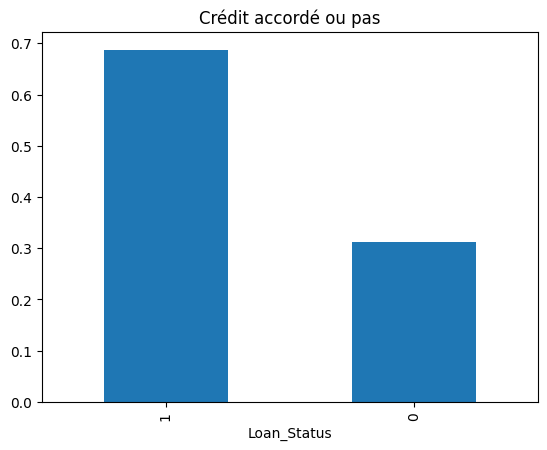

In [21]:
target.value_counts(normalize=True).plot.bar(title='Crédit accordé ou pas')

In [22]:
# la base de données utilisée pour EDA
df = pd.concat([cat_data, num_data, target], axis=1)

Les variables catégoriques

In [23]:
df['Gender'].value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

In [24]:
df['Gender'].value_counts(normalize=True)*100

Gender
1    81.758958
0    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'Comparaison des Sexes'}, xlabel='Gender'>

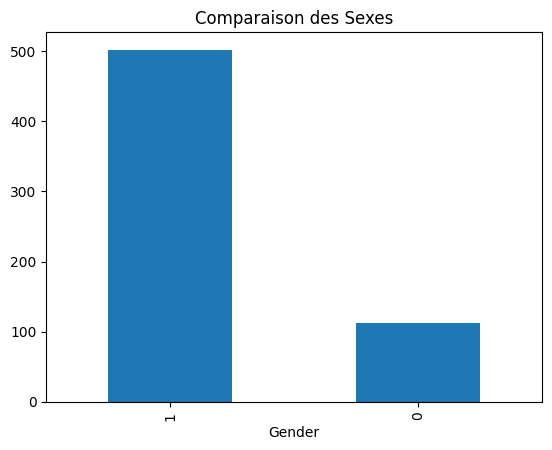

In [25]:
df['Gender'].value_counts().plot.bar(title='Comparaison des Sexes')

In [26]:
# Depedents
df['Dependents'].value_counts(normalize=True)*100

Dependents
0    58.631922
1    16.612378
2    16.449511
3     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'Le nombre des enfants'}, xlabel='Dependents'>

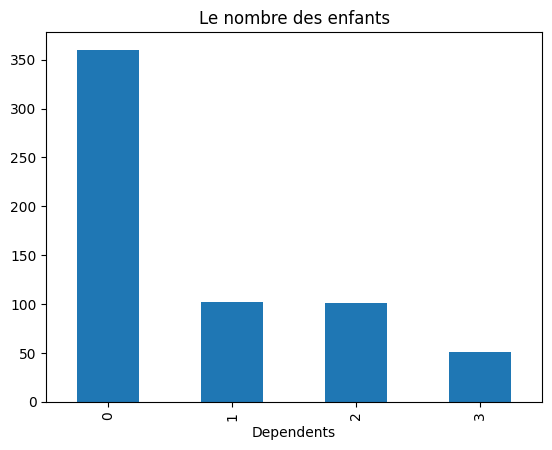

In [27]:
df['Dependents'].value_counts().plot.bar(title='Le nombre des enfants')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_17332\112195323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


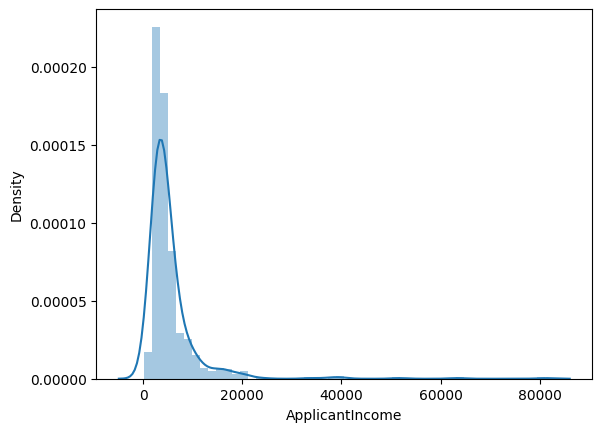

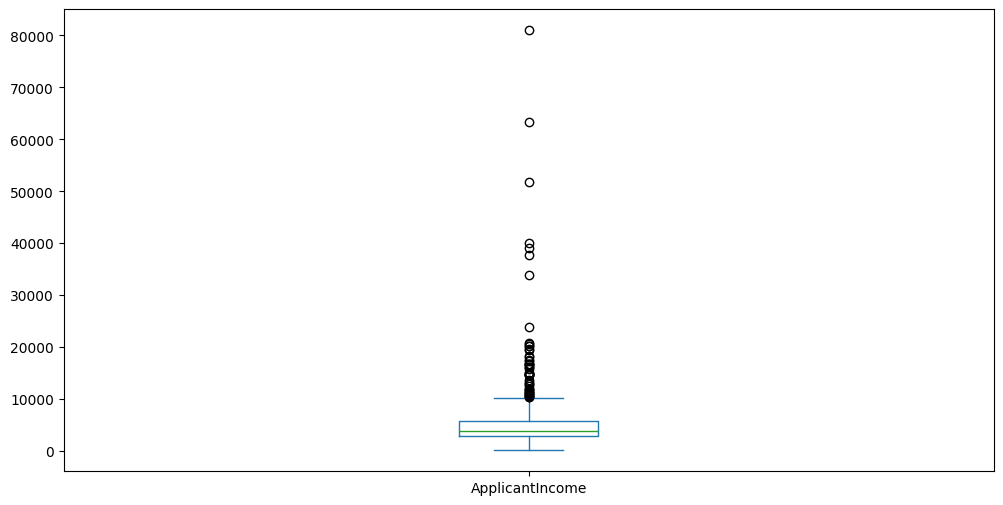

In [28]:
# ApplicantIncome
plt.figure()
sns.distplot(df['ApplicantIncome'])
plt.show()

plt.figure()
df['ApplicantIncome'].plot.box(figsize=(12,6))
plt.show()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_17332\1987592342.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


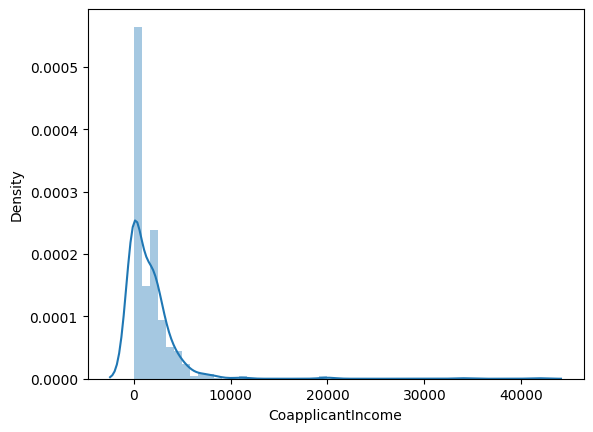

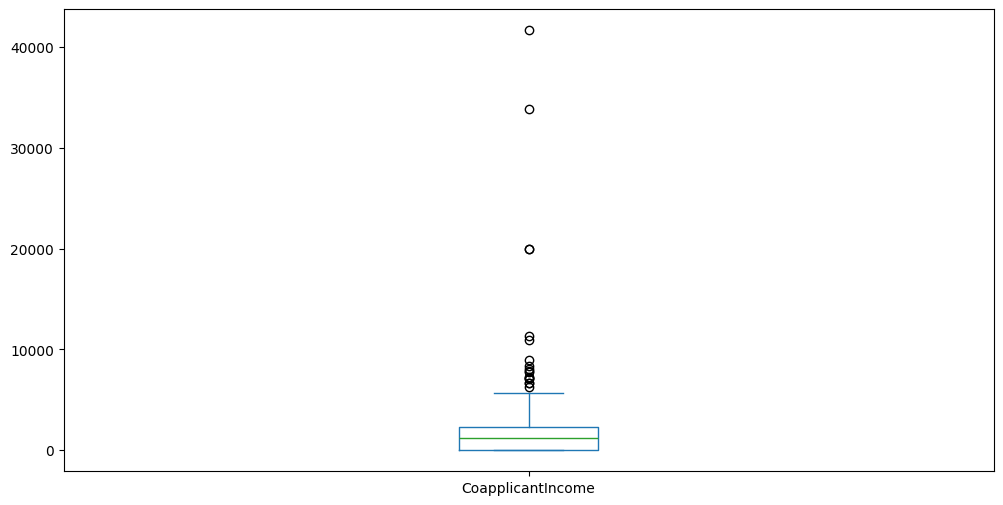

In [29]:
# CoapplicantIncome
plt.figure()
sns.distplot(df['CoapplicantIncome'])
plt.show()

plt.figure()
df['CoapplicantIncome'].plot.box(figsize=(12,6))
plt.show()

d:\Téléchargements\Machine Learning Fundamentals\loan_prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


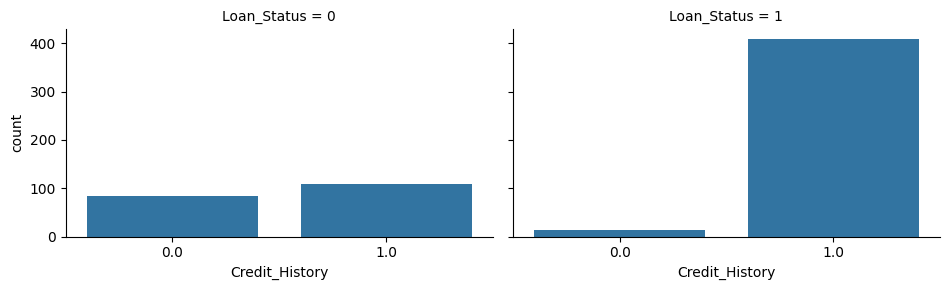

In [30]:
# Credit history 
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

d:\Téléchargements\Machine Learning Fundamentals\loan_prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


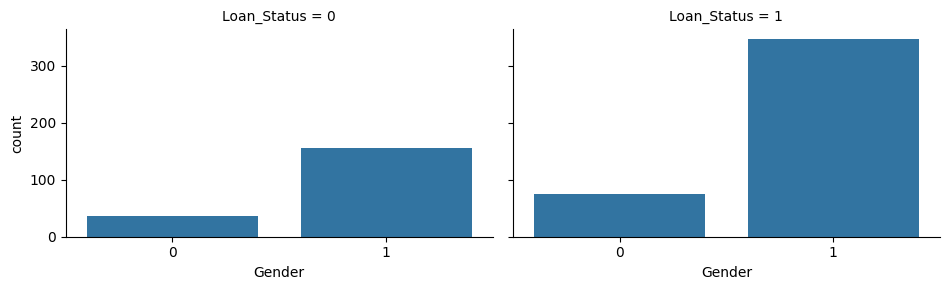

In [31]:
# Gender
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Gender')

d:\Téléchargements\Machine Learning Fundamentals\loan_prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


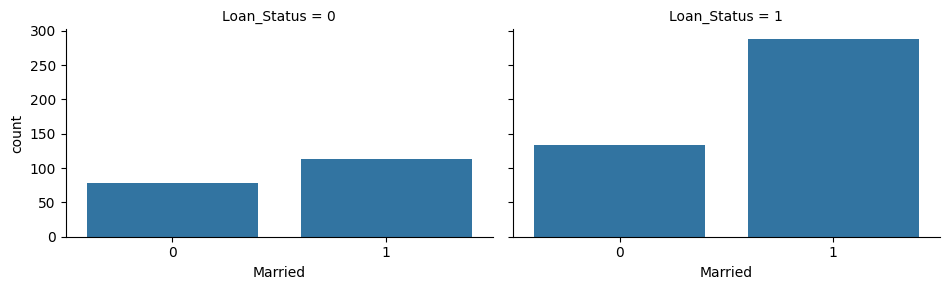

In [32]:
# Married
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Married')

d:\Téléchargements\Machine Learning Fundamentals\loan_prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


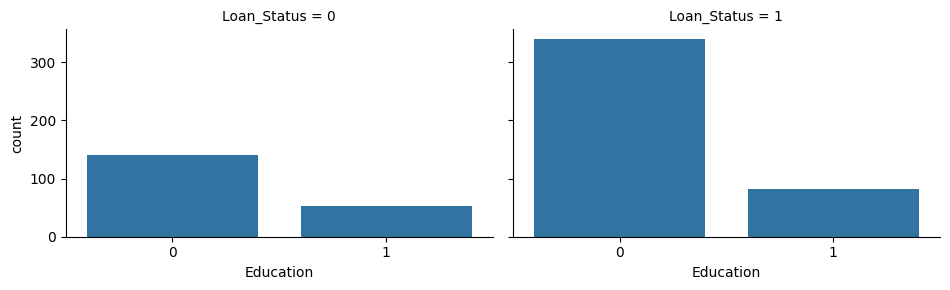

In [33]:
# Education
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Education')

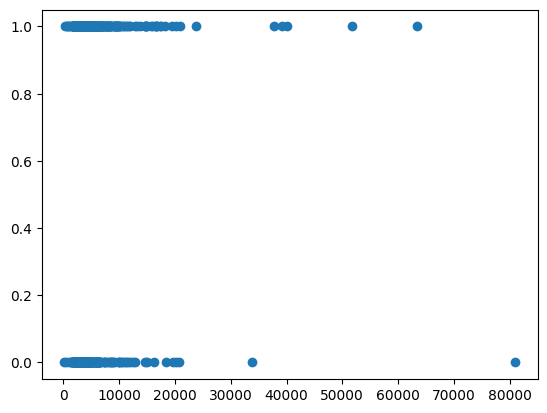

In [34]:
# revenu du demandeur
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])

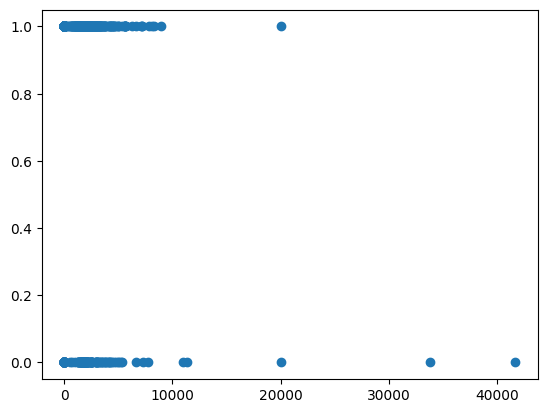

In [35]:
# revenu du co-demandeur
plt.scatter(df['CoapplicantIncome'], df['Loan_Status'])

In [36]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


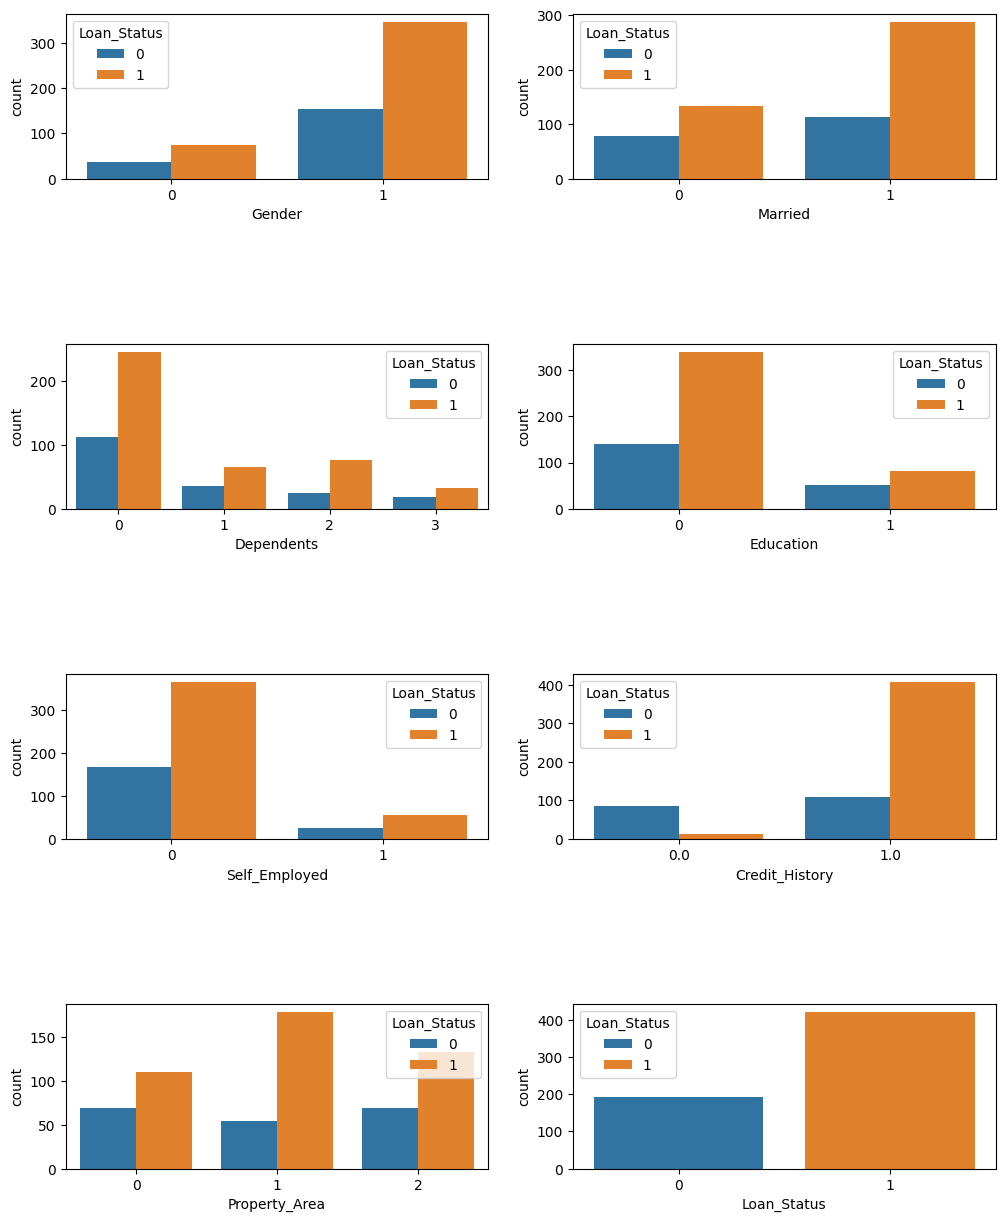

In [37]:
# Les variables catégoriques
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

<Axes: >

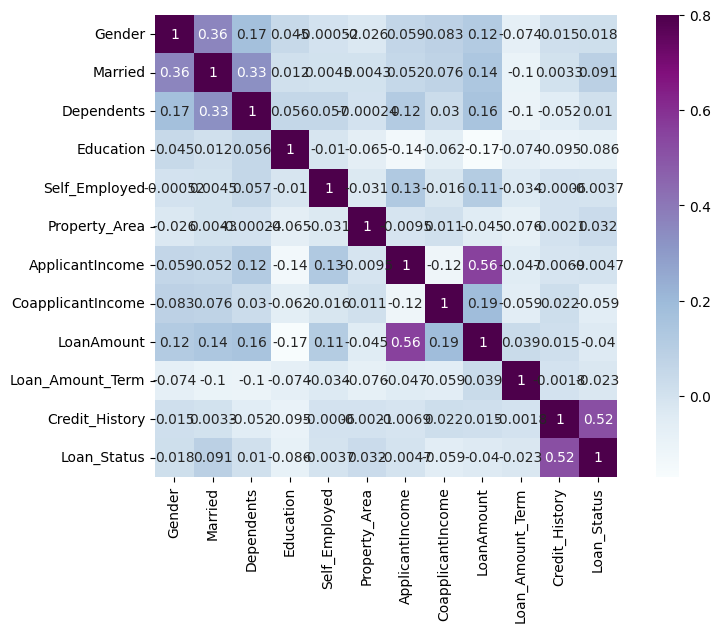

In [38]:
# Correlation des variables numériques
matrix = df.select_dtypes(include=['float64', 'int64']).corr()
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot=True)

### Création du modèle

In [39]:
# Diviser la base de données en une base de données test et d'entrainement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train,test in sss.split(X,y):
  X_train, X_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('y_train taille: ', y_train.shape)
print('y_test taille: ', y_test.shape)

X_train taille:  (491, 11)
X_test taille:  (123, 11)
y_train taille:  (491,)
y_test taille:  (123,)


In [40]:
# On va appliquer tois algorithmes Logisitic Regression, KNN, DecisionTree
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# La fonction de précision
def accu(y_true, y_pred, retu=False):
  acc = accuracy_score(y_true, y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du modèle est: {acc}')

# c'est la fonction d'application des modèles
def train_test_eval(models, X_train, y_train, X_test, y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train, y_train)
    accu(y_test, model.predict(X_test))
    print('-'*30)

train_test_eval(models, X_train, y_train, X_test, y_test)


LogisticRegression :
la precision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8455284552845529
------------------------------


d:\Téléchargements\Machine Learning Fundamentals\loan_prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


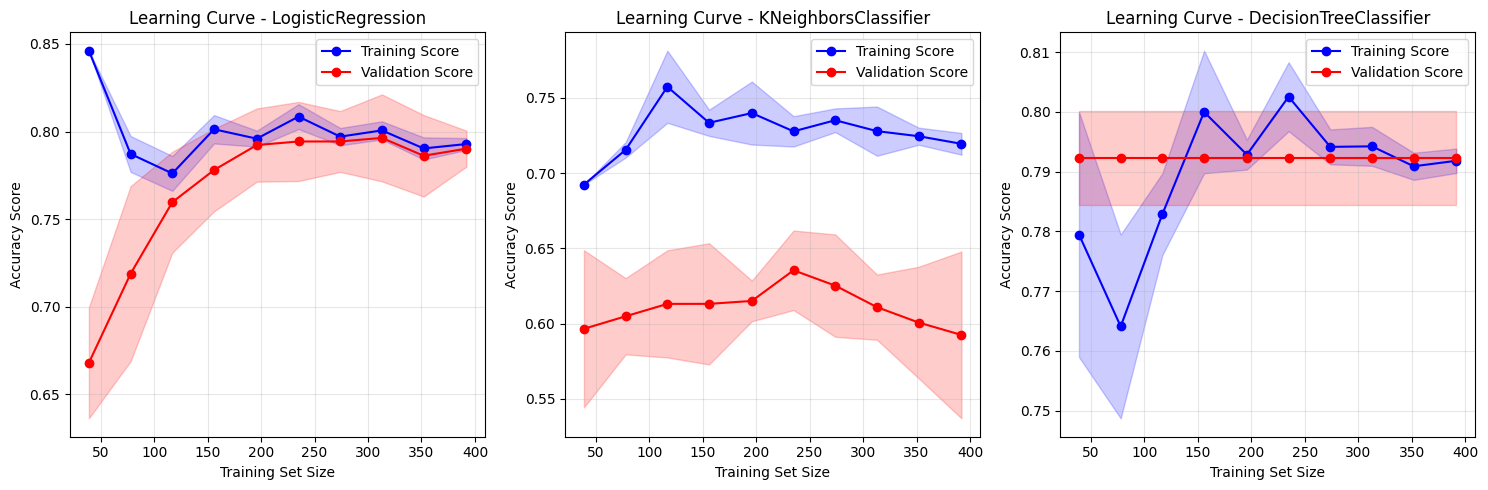

In [41]:
# Learning Curves pour les 3 modèles
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

model_names = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier']
model_list = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=1, random_state=42)
]

for idx, (name, model) in enumerate(zip(model_names, model_list)):
    # Calculer les learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    # Calculer les moyennes et écarts-types
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Tracer les courbes
    axes[idx].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    axes[idx].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    axes[idx].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    axes[idx].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')
    
    axes[idx].set_xlabel('Training Set Size')
    axes[idx].set_ylabel('Accuracy Score')
    axes[idx].set_title(f'Learning Curve - {name}')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

d:\Téléchargements\Machine Learning Fundamentals\loan_prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


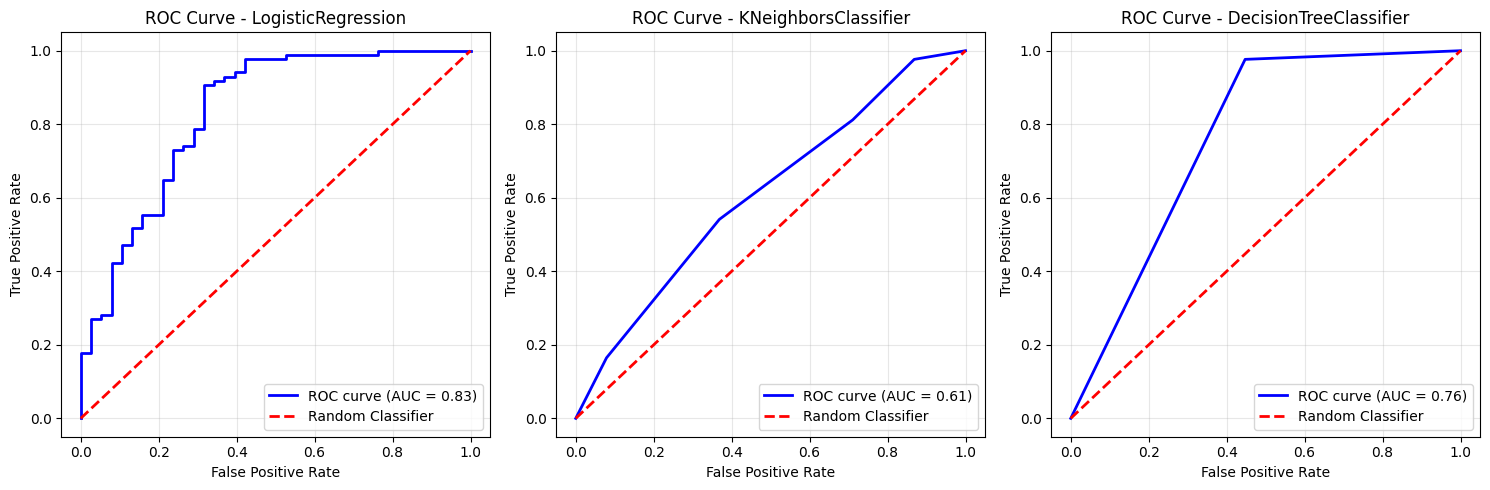

In [42]:
# Courbes ROC pour les 3 modèles
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, model) in enumerate(zip(model_names, model_list)):
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Obtenir les probabilités pour la classe positive
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Calculer la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Tracer la courbe ROC
    axes[idx].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[idx].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve - {name}')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interprétation du modèle avec SHAP et LIME

In [43]:
# Installer les packages nécessaires
import subprocess
import sys

try:
    import shap
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "shap", "-q"])
    import shap

try:
    import lime
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "lime", "-q"])
    import lime

import lime.lime_tabular
import warnings
warnings.filterwarnings('ignore')


d:\Téléchargements\Machine Learning Fundamentals\loan_prediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
# Entraîner le modèle Logistic Regression final
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Vérifier la précision
y_pred = lr_model.predict(X_test)
print(f'Précision du modèle Logistic Regression: {accuracy_score(y_test, y_pred):.4f}')


Précision du modèle Logistic Regression: 0.8537


#### 1. Coefficients du modèle Logistic Regression

In [45]:
# Afficher les coefficients du modèle
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Coefficients du modèle Logistic Regression:")
print(coefficients_df.to_string())


Coefficients du modèle Logistic Regression:
              Feature  Coefficient  Abs_Coefficient
10     Credit_History     2.576690         2.576690
1             Married     0.433714         0.433714
0              Gender    -0.407803         0.407803
3           Education    -0.386629         0.386629
4       Self_Employed    -0.239769         0.239769
2          Dependents     0.145129         0.145129
5       Property_Area     0.064984         0.064984
9    Loan_Amount_Term    -0.001818         0.001818
8          LoanAmount    -0.000720         0.000720
7   CoapplicantIncome    -0.000064         0.000064
6     ApplicantIncome    -0.000007         0.000007


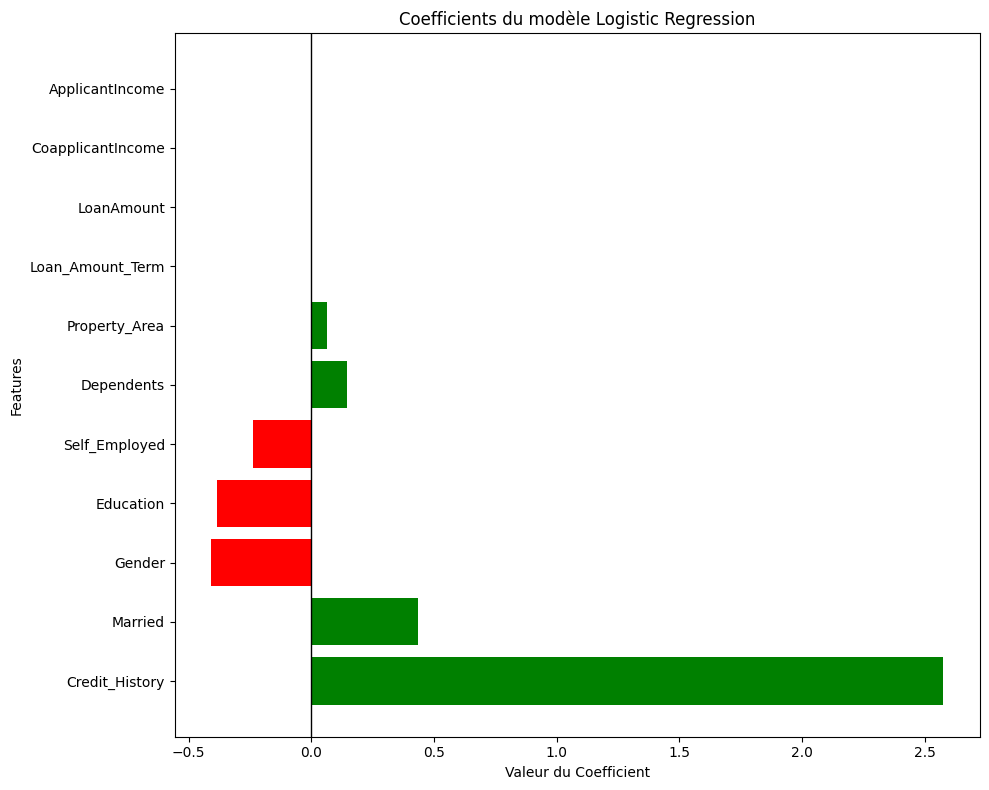

In [46]:
# Visualiser les coefficients
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in coefficients_df['Coefficient']]
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color=colors)
plt.xlabel('Valeur du Coefficient')
plt.ylabel('Features')
plt.title('Coefficients du modèle Logistic Regression')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.tight_layout()
plt.show()


#### 2. Interprétation avec LIME

In [47]:
# Créer l'explainer LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['Non Accordé', 'Accordé'],
    mode='classification',
    random_state=42,
    verbose=False
)

print("✓ Explainer LIME créé avec succès")


✓ Explainer LIME créé avec succès


In [48]:
# Fonction pour expliquer une instance avec LIME
def explain_instance_lime(idx, num_features=10):
    exp = explainer_lime.explain_instance(
        data_row=X_test.iloc[idx].values,
        predict_fn=lr_model.predict_proba,
        num_features=num_features
    )
    
    prediction = lr_model.predict(X_test.iloc[[idx]])[0]
    probability = lr_model.predict_proba(X_test.iloc[[idx]])[0]
    
    print(f"\n{'='*70}")
    print(f"Explication LIME - Instance {idx}")
    print(f"{'='*70}")
    print(f"Prédiction: {'Accordé' if prediction == 1 else 'Non Accordé'}")
    print(f"Probabilité (Non Accordé | Accordé): {probability[0]:.2%} | {probability[1]:.2%}")
    print(f"\nFacteurs influençant la décision:")
    print("-" * 70)
    
    for feature, weight in exp.as_list():
        direction = "↑ Favorise Accordé" if weight > 0 else "↓ Favorise Refus"
        print(f"{feature:45s} {weight:+.4f}  {direction}")
    
    return exp

# Expliquer l'instance 0
exp_0 = explain_instance_lime(0, num_features=10)



Explication LIME - Instance 0
Prédiction: Non Accordé
Probabilité (Non Accordé | Accordé): 83.76% | 16.24%

Facteurs influençant la décision:
----------------------------------------------------------------------
Married <= 0.00                               -0.0985  ↓ Favorise Refus
Education <= 0.00                             +0.0878  ↑ Favorise Accordé
Loan_Amount_Term <= 360.00                    +0.0826  ↑ Favorise Accordé
CoapplicantIncome <= 0.00                     +0.0544  ↑ Favorise Accordé
Dependents <= 0.00                            -0.0510  ↓ Favorise Refus
Self_Employed <= 0.00                         +0.0433  ↑ Favorise Accordé
Property_Area <= 0.00                         -0.0207  ↓ Favorise Refus
ApplicantIncome > 5825.00                     -0.0149  ↓ Favorise Refus
100.00 < LoanAmount <= 128.00                 +0.0118  ↑ Favorise Accordé
Credit_History <= 1.00                        +0.0000  ↓ Favorise Refus


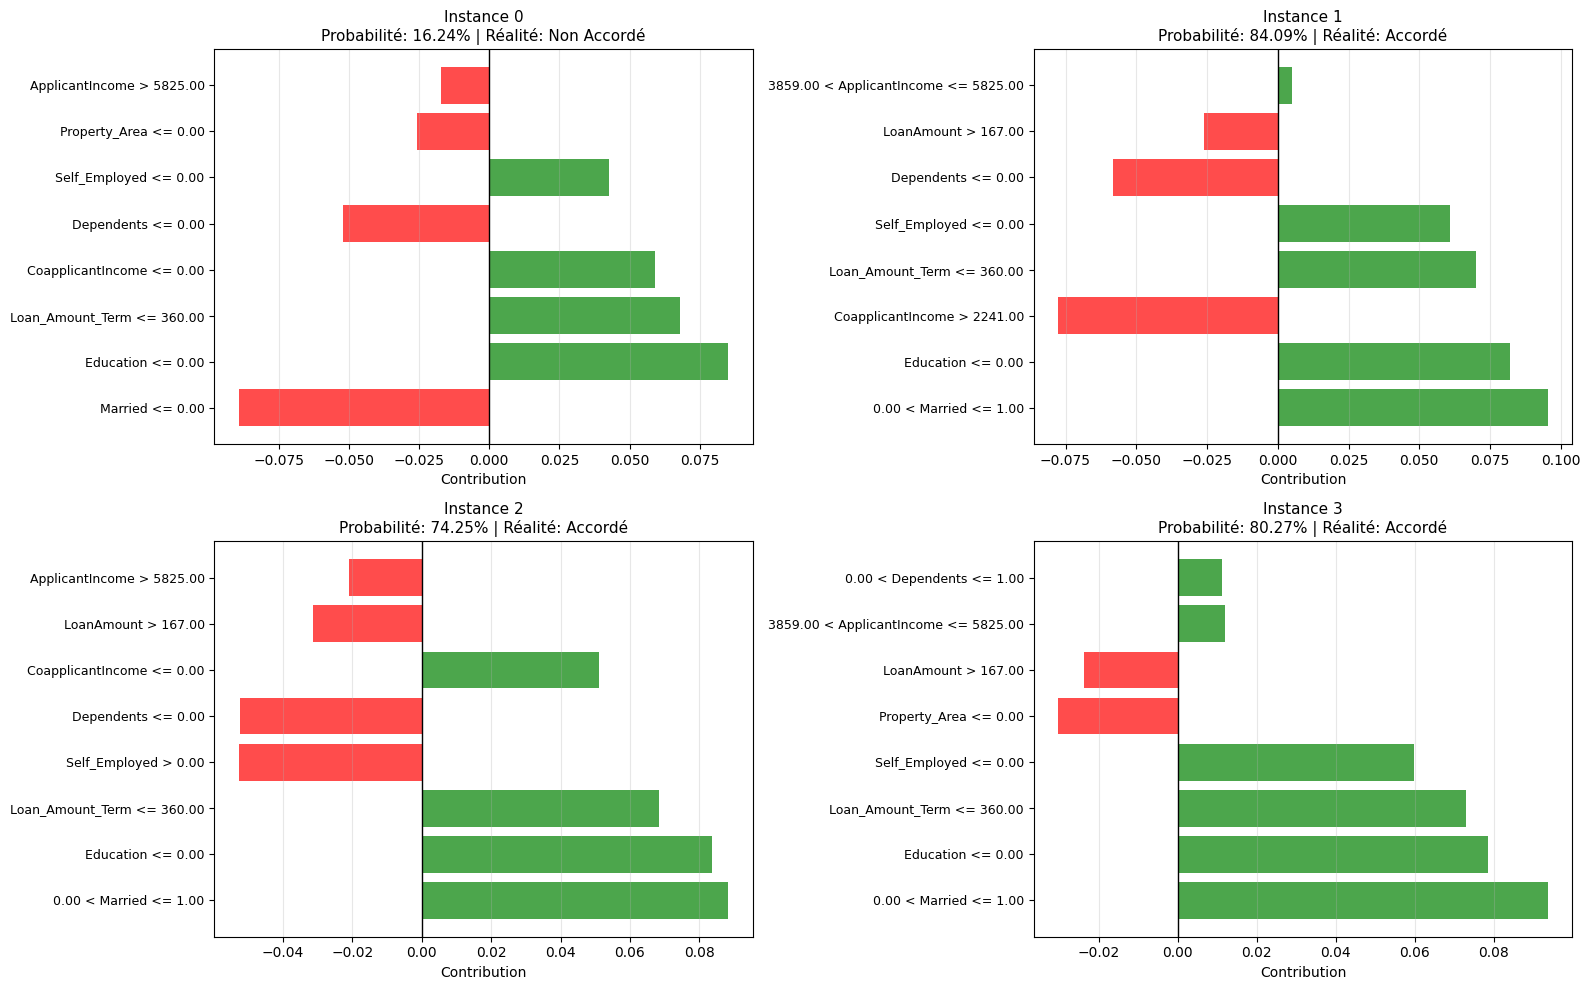

In [49]:
# Expliquer plusieurs instances avec visualisation
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx in range(4):
    exp = explainer_lime.explain_instance(
        data_row=X_test.iloc[idx].values,
        predict_fn=lr_model.predict_proba,
        num_features=8
    )
    
    exp_list = exp.as_list()
    features = [item[0] for item in exp_list]
    weights = [item[1] for item in exp_list]
    
    colors = ['green' if w > 0 else 'red' for w in weights]
    axes[idx].barh(range(len(features)), weights, color=colors, alpha=0.7)
    axes[idx].set_yticks(range(len(features)))
    axes[idx].set_yticklabels(features, fontsize=9)
    axes[idx].set_xlabel('Contribution', fontsize=10)
    
    prediction = lr_model.predict_proba(X_test.iloc[[idx]])[0]
    prob_accorded = prediction[1]
    actual = 'Accordé' if y_test.iloc[idx] == 1 else 'Non Accordé'
    
    axes[idx].set_title(f'Instance {idx}\nProbabilité: {prob_accorded:.2%} | Réalité: {actual}', fontsize=11)
    axes[idx].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


#### 3. Interprétation avec SHAP (simplifié)

Analyse SHAP simplifiée basée sur les coefficients du modèle:


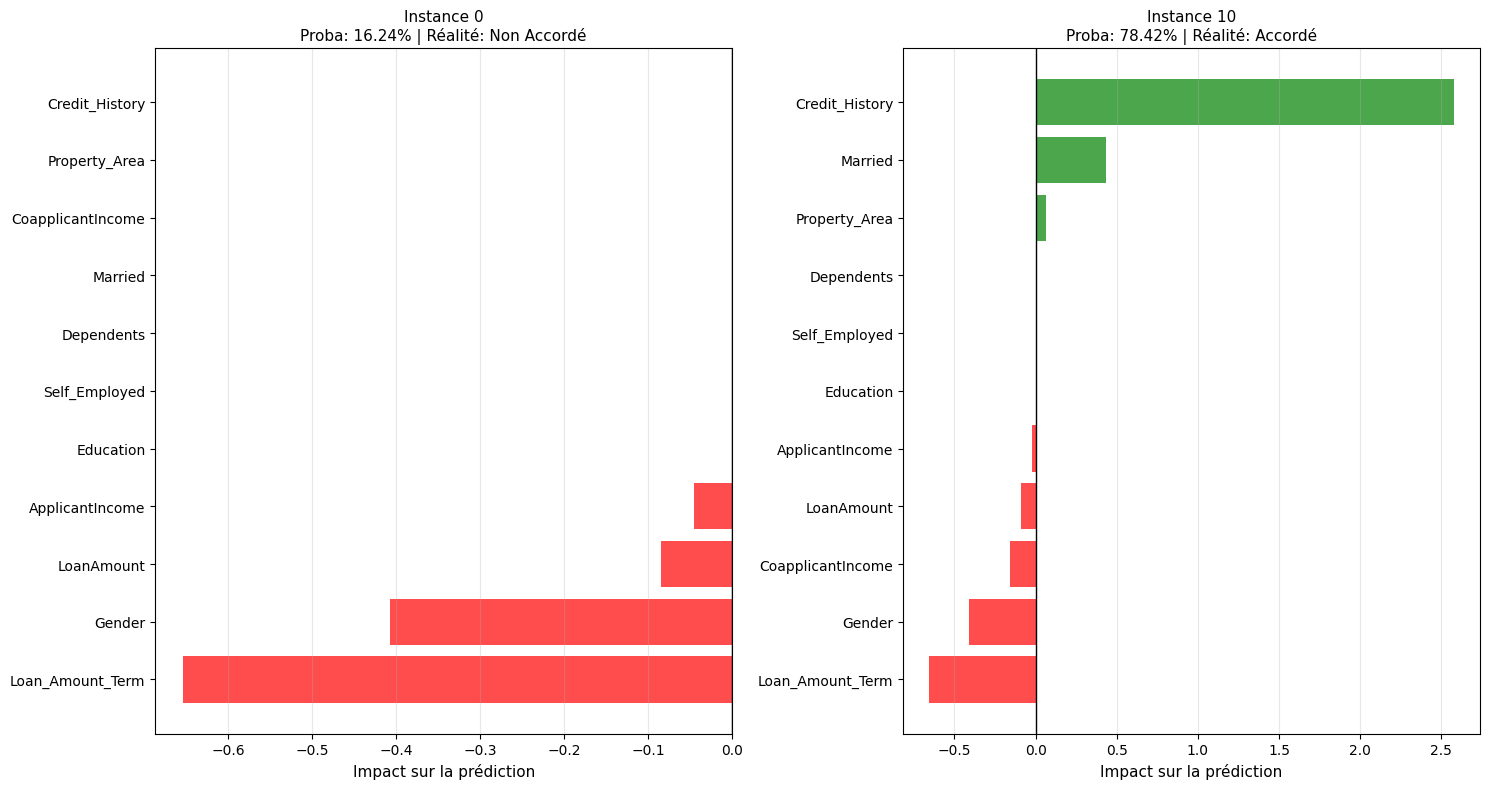

In [50]:
# Version simplifiée de SHAP (sans KernelExplainer qui est lent)
# Utiliser directement les coefficients et l'impact des features

print("Analyse SHAP simplifiée basée sur les coefficients du modèle:")
print("="*70)

# Calculer l'impact de chaque feature pour quelques instances
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

for plot_idx, instance_idx in enumerate([0, 10]):
    instance = X_test.iloc[instance_idx]
    
    # Calculer la contribution de chaque feature
    contributions = instance.values * lr_model.coef_[0]
    
    df_contrib = pd.DataFrame({
        'Feature': X.columns,
        'Value': instance.values,
        'Coefficient': lr_model.coef_[0],
        'Contribution': contributions
    }).sort_values('Contribution', ascending=True)
    
    colors = ['green' if x > 0 else 'red' for x in df_contrib['Contribution']]
    axes[plot_idx].barh(df_contrib['Feature'], df_contrib['Contribution'], color=colors, alpha=0.7)
    axes[plot_idx].set_xlabel('Impact sur la prédiction', fontsize=11)
    
    prob = lr_model.predict_proba(X_test.iloc[[instance_idx]])[0]
    actual = 'Accordé' if y_test.iloc[instance_idx] == 1 else 'Non Accordé'
    
    axes[plot_idx].set_title(f'Instance {instance_idx}\nProba: {prob[1]:.2%} | Réalité: {actual}', fontsize=11)
    axes[plot_idx].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[plot_idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Analyse du Fairness et du Bias du modèle

In [51]:
# Installer les packages nécessaires
import subprocess
import sys

try:
    from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "fairlearn", "-q"])
    from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference

try:
    from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
except ImportError:
    pass


#### 1. Analyse par groupe démographique (Gender)

In [52]:
# Préparer les données de test avec les groupes démographiques
X_test_with_gender = X_test.copy()
X_test_with_gender['Gender'] = cat_data.loc[X_test.index, 'Gender']

# Obtenir les prédictions
y_pred_test = lr_model.predict(X_test)
y_pred_proba_test = lr_model.predict_proba(X_test)[:, 1]

print("="*70)
print("ANALYSE DE FAIRNESS - Par Genre (Gender)")
print("="*70)

# Taux de sélection par genre
print("\n1. TAUX DE SÉLECTION PAR GROUPE:")
print("-" * 70)

for gender_value, gender_name in [(0, 'Femme'), (1, 'Homme')]:
    mask = X_test_with_gender['Gender'] == gender_value
    if mask.sum() > 0:
        selection = y_pred_test[mask].mean()
        count = mask.sum()
        print(f"{gender_name:20s}: {selection:.2%} ({count} instances)")


ANALYSE DE FAIRNESS - Par Genre (Gender)

1. TAUX DE SÉLECTION PAR GROUPE:
----------------------------------------------------------------------
Femme               : 68.00% (25 instances)
Homme               : 83.67% (98 instances)


In [53]:
# Matrice de confusion par genre
print("\n2. MATRICES DE CONFUSION PAR GENRE:")
print("-" * 70)

for gender_value, gender_name in [(0, 'Femme'), (1, 'Homme')]:
    mask = X_test_with_gender['Gender'] == gender_value
    if mask.sum() > 0:
        y_true_group = y_test[mask]
        y_pred_group = y_pred_test[mask]
        
        print(f"\n{gender_name}:")
        cm = confusion_matrix(y_true_group, y_pred_group)
        print(cm)
        
        # Metrics
        precision = precision_score(y_true_group, y_pred_group, zero_division=0)
        recall = recall_score(y_true_group, y_pred_group, zero_division=0)
        f1 = f1_score(y_true_group, y_pred_group, zero_division=0)
        accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
        
        print(f"  Précision: {precision:.4f}")
        print(f"  Rappel:    {recall:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        print(f"  Accuracy:  {accuracy:.4f}")



2. MATRICES DE CONFUSION PAR GENRE:
----------------------------------------------------------------------

Femme:
[[ 7  4]
 [ 1 13]]
  Précision: 0.7647
  Rappel:    0.9286
  F1-Score:  0.8387
  Accuracy:  0.8000

Homme:
[[15 12]
 [ 1 70]]
  Précision: 0.8537
  Rappel:    0.9859
  F1-Score:  0.9150
  Accuracy:  0.8673


In [54]:
# Différence de parité démographique
print("\n3. DISPARITÉ DÉMOGRAPHIQUE:")
print("-" * 70)

gender_groups = X_test_with_gender['Gender']

def fairness_metrics(y_true, y_pred, groups):
    """Calculer les métriques de fairness"""
    
    metrics = {}
    
    for group_val in groups.unique():
        mask = groups == group_val
        group_name = 'Femme' if group_val == 0 else 'Homme'
        
        y_true_g = y_true[mask]
        y_pred_g = y_pred[mask]
        
        if len(y_true_g) > 0:
            metrics[group_name] = {
                'selection_rate': y_pred_g.mean(),
                'accuracy': (y_true_g == y_pred_g).mean(),
                'tpr': recall_score(y_true_g, y_pred_g, zero_division=0),  # True Positive Rate
                'fpr': 1 - recall_score(y_true_g[y_true_g == 0], y_pred_g[y_true_g == 0], zero_division=0) if (y_true_g == 0).sum() > 0 else 0  # False Positive Rate
            }
    
    return metrics

metrics_by_gender = fairness_metrics(y_test, y_pred_test, gender_groups)

print("\nMétriques de Fairness par Genre:")
for group, metrics in metrics_by_gender.items():
    print(f"\n{group}:")
    print(f"  Taux de sélection:     {metrics['selection_rate']:.2%}")
    print(f"  Accuracy:              {metrics['accuracy']:.4f}")
    print(f"  Taux Vrai Positif:     {metrics['tpr']:.4f}")
    print(f"  Taux Faux Positif:     {metrics['fpr']:.4f}")

# Calculer les disparités
selection_rates = [metrics_by_gender[g]['selection_rate'] for g in metrics_by_gender]
if len(selection_rates) > 1:
    disparite = abs(selection_rates[0] - selection_rates[1])
    print(f"\nDifférence de taux de sélection: {disparite:.2%}")
    print(f"(Disparité acceptable si < 10%)")



3. DISPARITÉ DÉMOGRAPHIQUE:
----------------------------------------------------------------------

Métriques de Fairness par Genre:

Homme:
  Taux de sélection:     83.67%
  Accuracy:              0.8673
  Taux Vrai Positif:     0.9859
  Taux Faux Positif:     1.0000

Femme:
  Taux de sélection:     68.00%
  Accuracy:              0.8000
  Taux Vrai Positif:     0.9286
  Taux Faux Positif:     1.0000

Différence de taux de sélection: 15.67%
(Disparité acceptable si < 10%)


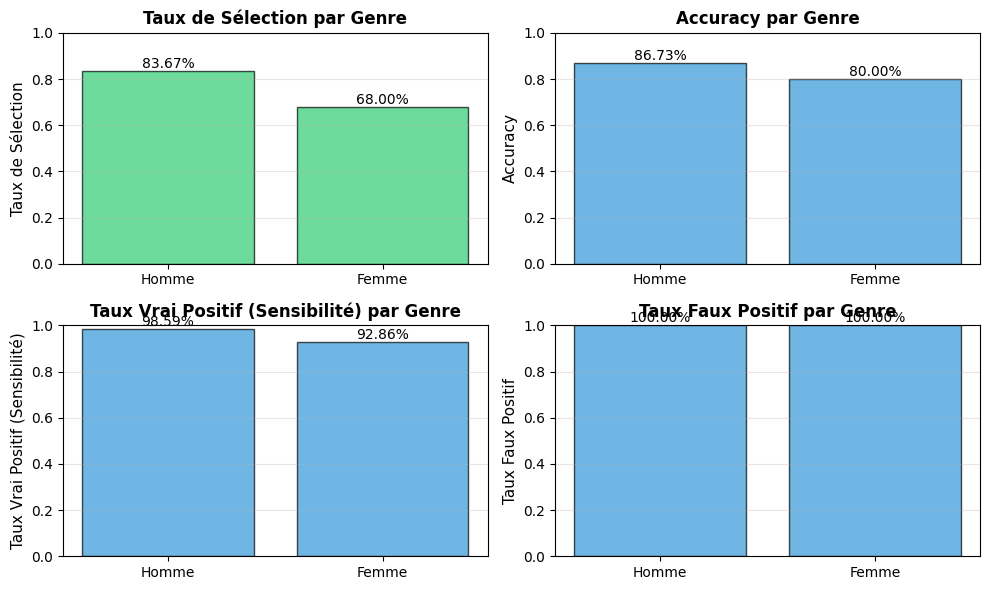

In [55]:
# Visualisation des performances par genre
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

metrics_names = ['selection_rate', 'accuracy', 'tpr', 'fpr']
titles = ['Taux de Sélection', 'Accuracy', 'Taux Vrai Positif (Sensibilité)', 'Taux Faux Positif']

for idx, (metric, title) in enumerate(zip(metrics_names, titles)):
    ax = axes[idx // 2, idx % 2]
    groups = list(metrics_by_gender.keys())
    values = [metrics_by_gender[g][metric] for g in groups]
    
    colors = ['#2ecc71' if metric == 'selection_rate' else '#3498db' for _ in groups]
    bars = ax.bar(groups, values, color=colors, alpha=0.7, edgecolor='black')
    
    ax.set_ylabel(title, fontsize=11)
    ax.set_ylim(0, 1)
    ax.set_title(f'{title} par Genre', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### 2. Analyse par groupe démographique (Married)


ANALYSE DE FAIRNESS - Par Statut Marital (Married)

Métriques de Fairness par Statut Marital:


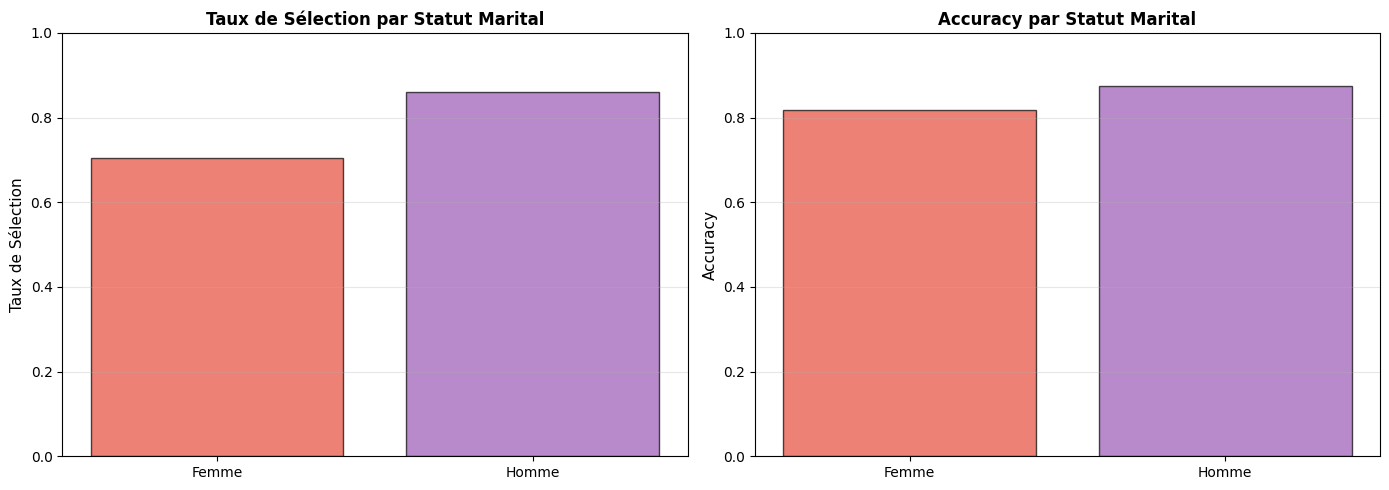

In [56]:
print("\n" + "="*70)
print("ANALYSE DE FAIRNESS - Par Statut Marital (Married)")
print("="*70)

X_test_with_married = X_test.copy()
X_test_with_married['Married'] = cat_data.loc[X_test.index, 'Married']
married_groups = X_test_with_married['Married']

metrics_by_married = fairness_metrics(y_test, y_pred_test, married_groups)

print("\nMétriques de Fairness par Statut Marital:")
for group_val in sorted(married_groups.unique()):
    group_name = 'Marié' if group_val == 1 else 'Non Marié'
    if group_name in metrics_by_married:
        metrics = metrics_by_married[group_name]
        print(f"\n{group_name}:")
        print(f"  Taux de sélection:     {metrics['selection_rate']:.2%}")
        print(f"  Accuracy:              {metrics['accuracy']:.4f}")
        print(f"  Taux Vrai Positif:     {metrics['tpr']:.4f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

groups_married = list(metrics_by_married.keys())
selection_rates_m = [metrics_by_married[g]['selection_rate'] for g in groups_married]
accuracies_m = [metrics_by_married[g]['accuracy'] for g in groups_married]

axes[0].bar(groups_married, selection_rates_m, color=['#e74c3c', '#9b59b6'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Taux de Sélection', fontsize=11)
axes[0].set_title('Taux de Sélection par Statut Marital', fontsize=12, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(groups_married, accuracies_m, color=['#e74c3c', '#9b59b6'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Accuracy par Statut Marital', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


#### 3. Heatmap des biais par groupes

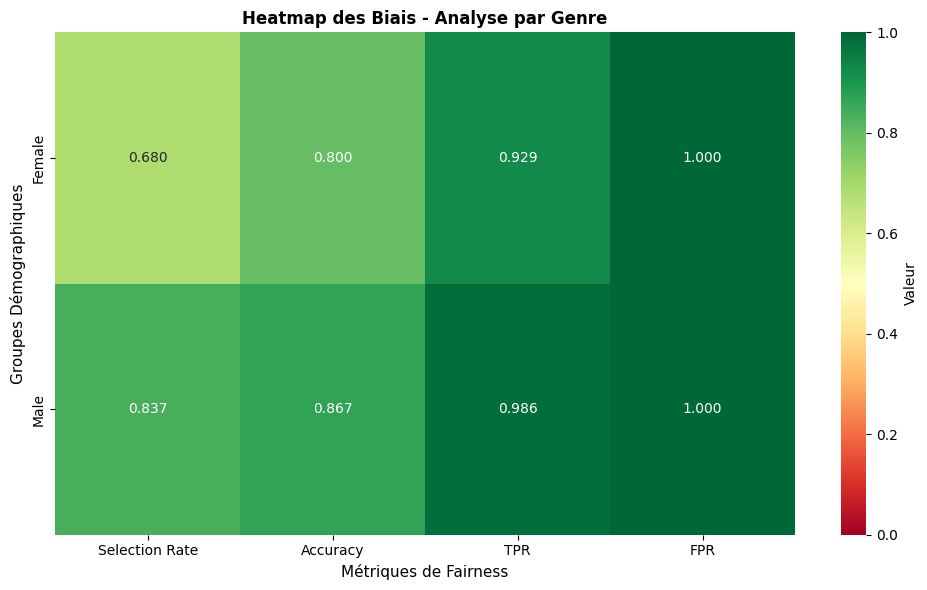

In [57]:
# Créer une matrice de biais
groups_list = ['Female', 'Male', 'Married', 'Not Married']
metrics_list = ['Selection Rate', 'Accuracy', 'TPR', 'FPR']

bias_matrix = np.zeros((len(groups_list), len(metrics_list)))

# Remplir la matrice
for i, metric in enumerate(metrics_list):
    metric_key = metric.lower().replace(' ', '_')
    
    # Gender groups
    for j, (gender_val, gender_name) in enumerate([(0, 'Female'), (1, 'Male')]):
        mask = X_test_with_gender['Gender'] == gender_val
        if mask.sum() > 0:
            y_true_g = y_test[mask]
            y_pred_g = y_pred_test[mask]
            
            if metric == 'Selection Rate':
                bias_matrix[j, i] = y_pred_g.mean()
            elif metric == 'Accuracy':
                bias_matrix[j, i] = (y_true_g == y_pred_g).mean()
            elif metric == 'TPR':
                bias_matrix[j, i] = recall_score(y_true_g, y_pred_g, zero_division=0)
            elif metric == 'FPR':
                bias_matrix[j, i] = 1 - recall_score(y_true_g[y_true_g == 0], y_pred_g[y_true_g == 0], zero_division=0) if (y_true_g == 0).sum() > 0 else 0

# Visualiser la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bias_matrix[:2, :], annot=True, fmt='.3f', cmap='RdYlGn', 
            xticklabels=metrics_list, yticklabels=['Female', 'Male'],
            cbar_kws={'label': 'Valeur'}, vmin=0, vmax=1)
plt.title('Heatmap des Biais - Analyse par Genre', fontsize=12, fontweight='bold')
plt.ylabel('Groupes Démographiques', fontsize=11)
plt.xlabel('Métriques de Fairness', fontsize=11)
plt.tight_layout()
plt.show()


#### 4. Analyse des résidus (erreurs) par groupe

In [58]:
print("\n" + "="*70)
print("ANALYSE DES ERREURS DE PRÉDICTION PAR GROUPE")
print("="*70)

# Calculer les erreurs
errors = (y_test.values != y_pred_test).astype(int)
false_positives = ((y_test.values == 0) & (y_pred_test == 1)).astype(int)
false_negatives = ((y_test.values == 1) & (y_pred_test == 0)).astype(int)

print("\nPar Genre:")
for gender_val, gender_name in [(0, 'Femme'), (1, 'Homme')]:
    mask = X_test_with_gender['Gender'] == gender_val
    if mask.sum() > 0:
        error_rate = errors[mask].mean()
        fp_rate = false_positives[mask].sum() / mask.sum()
        fn_rate = false_negatives[mask].sum() / mask.sum()
        
        print(f"\n{gender_name}:")
        print(f"  Taux d'erreur global:  {error_rate:.2%}")
        print(f"  Taux faux positifs:    {fp_rate:.2%}")
        print(f"  Taux faux négatifs:    {fn_rate:.2%}")



ANALYSE DES ERREURS DE PRÉDICTION PAR GROUPE

Par Genre:

Femme:
  Taux d'erreur global:  20.00%
  Taux faux positifs:    16.00%
  Taux faux négatifs:    4.00%

Homme:
  Taux d'erreur global:  13.27%
  Taux faux positifs:    12.24%
  Taux faux négatifs:    1.02%


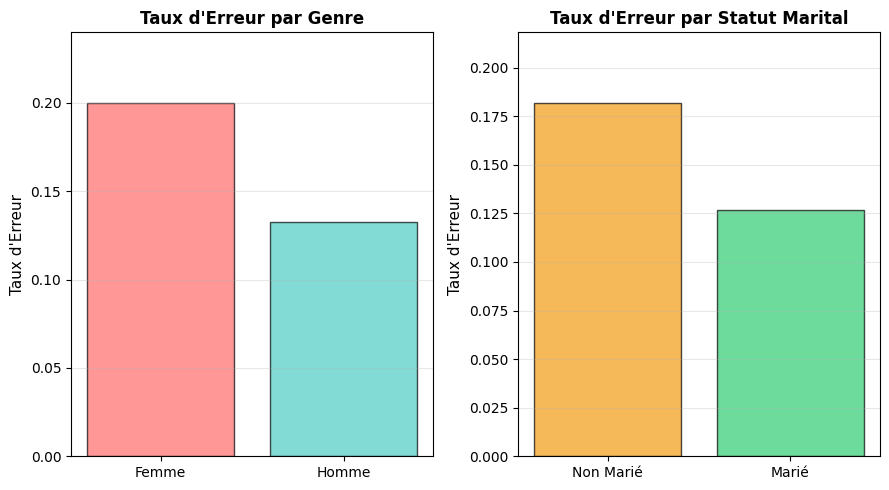

In [59]:
# Visualisation des erreurs par groupe
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Par Genre
error_by_gender = []
for gender_val, gender_name in [(0, 'Femme'), (1, 'Homme')]:
    mask = X_test_with_gender['Gender'] == gender_val
    if mask.sum() > 0:
        error_by_gender.append(errors[mask].mean())

axes[0].bar(['Femme', 'Homme'], error_by_gender, color=['#ff6b6b', '#4ecdc4'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Taux d\'Erreur', fontsize=11)
axes[0].set_title('Taux d\'Erreur par Genre', fontsize=12, fontweight='bold')
axes[0].set_ylim(0, max(error_by_gender) * 1.2)
axes[0].grid(axis='y', alpha=0.3)

# Par Statut Marital
error_by_married = []
for married_val in sorted(married_groups.unique()):
    mask = X_test_with_married['Married'] == married_val
    if mask.sum() > 0:
        error_by_married.append(errors[mask].mean())

married_labels = ['Non Marié', 'Marié']
axes[1].bar(married_labels, error_by_married, color=['#f39c12', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Taux d\'Erreur', fontsize=11)
axes[1].set_title('Taux d\'Erreur par Statut Marital', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, max(error_by_married) * 1.2)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


#### 5. Résumé des conclusions sur la Fairness


RÉSUMÉ - ANALYSE DE FAIRNESS DU MODÈLE
              Feature  Importance
10     Credit_History    2.576690
1             Married    0.433714
0              Gender    0.407803
3           Education    0.386629
4       Self_Employed    0.239769
2          Dependents    0.145129
5       Property_Area    0.064984
9    Loan_Amount_Term    0.001818
8          LoanAmount    0.000720
7   CoapplicantIncome    0.000064
6     ApplicantIncome    0.000007


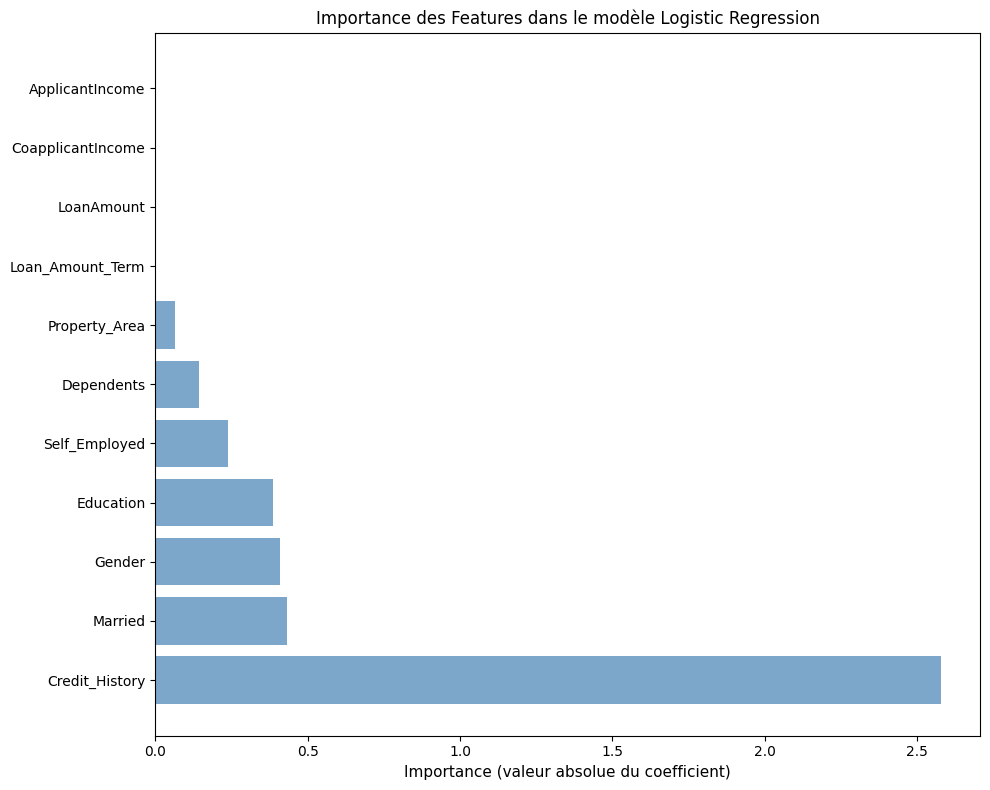

In [60]:
print("\n" + "="*70)
print("RÉSUMÉ - ANALYSE DE FAIRNESS DU MODÈLE")
print("="*70)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_[0])
}).sort_values('Importance', ascending=False)

print(importance_df.to_string())

# Visualisation
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue', alpha=0.7)
plt.xlabel("Importance (valeur absolue du coefficient)", fontsize=11)
plt.title("Importance des Features dans le modèle Logistic Regression", fontsize=12)
plt.tight_layout()
plt.show()


### PLAN DE DÉPLOIEMENT SUR STREAMLIT CLOUD

### Processus de Déploiement Simplifié

### **Étape 1 : Préparer le Repository GitHub**
1. Créer un repository sur GitHub : https://github.com/new
2. Cloner localement : `git clone <url>`
3. Ajouter vos fichiers (streamlit_app.py, requirements.txt, models/, data/)
4. Committer et pusher :
   ```bash
   git add .
   git commit -m "Initial commit"
   git push origin main
   ```

### **Étape 2 : Créer requirements.txt**
À la racine du projet, créer `requirements.txt` avec :

scikit-learn>=1.3.0 pandas>=2.0.0 numpy>=1.24.0 streamlit>=1.28.0 matplotlib>=3.7.0 seaborn>=0.12.0 shap>=0.43.0 lime>=0.2.0 joblib>=1.3.0 plotly>=5.14.0

### **Étape 3 : Créer l'app Streamlit**
Créer `streamlit_app.py` à la racine avec votre interface Streamlit.

### **Étape 4 : Déployer sur Streamlit Cloud**
1. Aller à https://streamlit.io/cloud
2. Se connecter avec GitHub
3. Cliquer "New app"
4. Sélectionner :
   - Repository : `YOUR_USERNAME/loan-prediction-app`
   - Branch : `main`
   - File : `streamlit_app.py`
5. Cliquer "Deploy"

### **Étape 5 : Accéder à l'app**
Votre app sera disponible à :

[https://YOUR_USERNAME-loan-prediction-app.streamlit.app](https://YOUR_USERNAME-loan-prediction-app.streamlit.app)
